## Problem 1

In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import random
from tqdm import tqdm

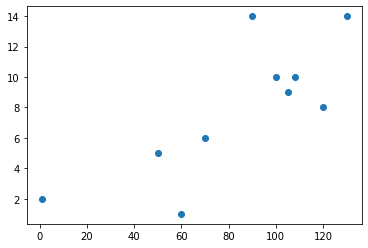

In [2]:
# X - Protein, y - sugar
X = np.array([[70], [120], [50], [60], [1], [100], [90], [130], [105], [108]])
y = np.array([6, 8, 5, 1, 2, 10, 14, 14, 9, 10])
plt.scatter(X, y)

In [3]:
n = X.shape[1]
r = np.linalg.matrix_rank(X)

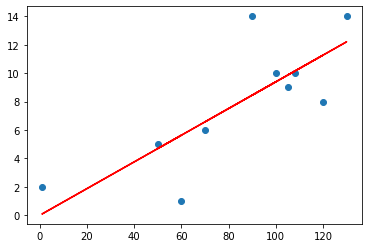

In [4]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))
V = VT.T
X_plus = V.dot(D_plus).dot(U.T)
w = X_plus.dot(y)
error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2
np.linalg.lstsq(X, y, rcond=None)
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

## Problem 2
### a) Standardize the data

In [5]:
X = np.array([70, 120, 50, 60, 1, 100, 90, 130, 105, 108])
y = np.array([6, 8, 5, 1, 2, 10, 14, 14, 9, 10])

In [6]:
def standardize(data):
    mean = data.mean()
    dev = data.std()
    data_stan = np.zeros([data.shape[0]])

    for i in range(data.shape[0]):
        data_stan[i] = (data[i] - mean) / dev
    return data_stan

X_stan = standardize(X)
y_stan = standardize(y)

### b) SSE

In [7]:
a = random.random()
b = random.random()
y_pred = b * X_stan + a
y_pred

array([0.56242674, 0.77737853, 0.47644602, 0.51943638, 0.26579327,
       0.69139781, 0.64840746, 0.82036889, 0.71289299, 0.7257901 ])

In [8]:
def SSE(y, y_pred):
    if y.shape != y_pred.shape:
        raise 0

    sse = 0
    for i in range(y.shape[0]):
        sse = sse + abs(y[i] - y_pred[i]) ** 2
    
    return sse

sse = SSE(y_stan, y_pred)
sse

11.638115712112162

## Problem 3
### b)

In [9]:
def df_b(X, y, a, b):    
    result = 0
    for i in range(y.shape[0]):
        result = result + 2 * X[i] *(X[i] * b + a - y[i])

    return result

def df_a(X, y, a, b):
    result = 0
    for i in range(y.shape[0]):
        result = result + 2 * (a + b * X[i] - y[i])

    return result

def gradient_descent(X, y, prec, lr=0.1):
    b = random.random()
    a = random.random()
    loss = 5
    it = 0

    while loss >= prec and it <= 100:
        der_a = df_a(X, y, a, b)
        der_b = df_b(X, y, a, b)
        a_now = a - lr * der_a
        b_now = b - lr * der_b

        y_pred = b_now * X + a_now
        loss = SSE(y, y_pred)
        a = a_now
        b = b_now
        it += 1
        
    return a, b, loss

In [11]:
gradient_descent(X_stan, y_stan, 0.01, 0.01)

(-4.827965559165301e+128, 5.695159030081006e+128, 5.574408781839954e+258)

## Problem 4
### i) Stochastic Gradient Descent

In [17]:
def df_a_single(X_single, y_single, a, b):
    return 2 * (a + b * X_single - y_single)

def df_b_single(X_single, y_single, a, b):
    return 2 * X_single * (X_single * b + a - y_single)

def stochastic_gradient_descent(X, y, prec, lr=0.01):
    # Shuffle
    order = list()
    for i in range(X.shape[0]):
        order.append(i)
    random.shuffle(order)

    # Start iteration
    a = random.random()
    b = random.random()
    it = 0
    loss = 5

    while loss >= prec and it <= 100:
        for i in order:
            a_now = a - lr * df_a_single(X[i],y[i],a,b)
            b_now = b - lr * df_b_single(X[i],y[i],a,b)

            y_pred = b_now * X + a_now
            loss = SSE(y, y_pred)
            a = a_now
            b = b_now
            it += 1
        
    return a, b, loss

    

In [18]:
stochastic_gradient_descent(X_stan, y_stan, 0.01)

[7, 5, 3, 6, 9, 4, 1, 2, 8, 0]


(0.06165174623471904, 0.6856693323341998, 4.0898958091663715)

### ii) Batch Gradient Descent is just the default one and has been implemented above.